In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D
from tensorflow.keras.models import Sequential
import numpy as np

In [2]:
train_loc=r'C:\Users\mohit\Downloads\sugarcane_spilts\train'
test_loc=r'C:\Users\mohit\Downloads\sugarcane_spilts\test'
val_loc=r'C:\Users\mohit\Downloads\sugarcane_spilts\val'

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255
                               )
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
train_data=train_datagen.flow_from_directory(train_loc,
                                            batch_size=100,
                                            target_size=(150,150),
                                            class_mode='categorical'
                                            )
val_data=train_datagen.flow_from_directory(val_loc,
                                            batch_size=100,
                                            target_size=(150,150),
                                            class_mode='categorical'
                                            )
test_data=test_datagen.flow_from_directory(test_loc,
                                          batch_size=100,
                                          target_size=(150,150),
                                           class_mode='categorical'
                                          )

Found 1764 images belonging to 5 classes.
Found 504 images belonging to 5 classes.
Found 253 images belonging to 5 classes.


In [5]:
batch=train_data.next()
print(batch[0].shape)
print(batch[1].shape)

(100, 150, 150, 3)
(100, 5)


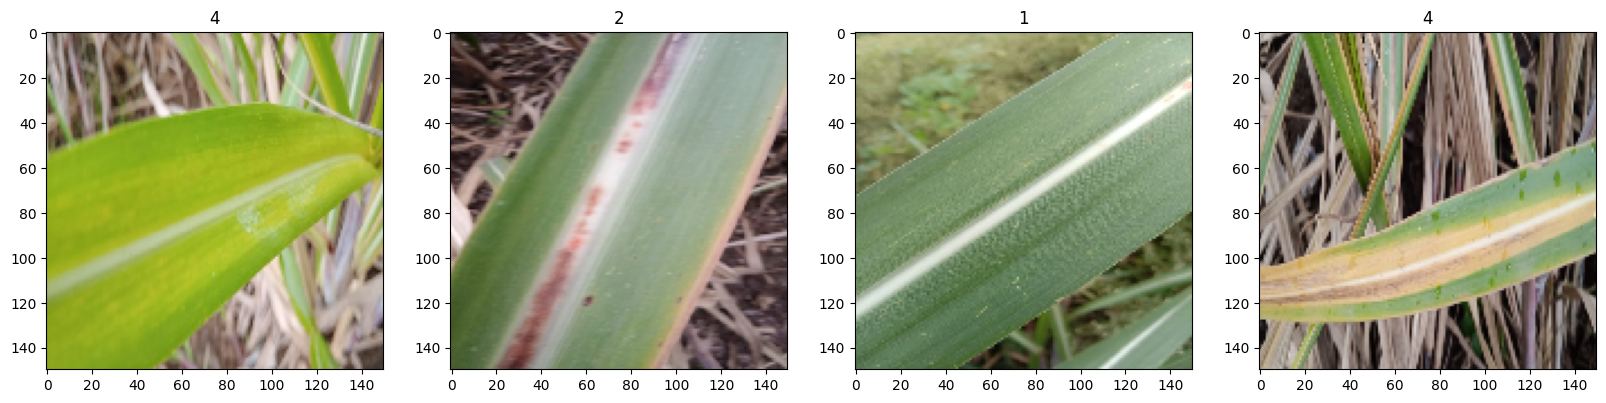

In [6]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(np.argmax(batch[1][idx]))

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['acc'])


In [8]:
history=model.fit(train_data,
                 epochs=40,
                 validation_data=val_data,
                 verbose=1,
                 )


Epoch 1/40
18/18 [==============================] - 35s 2s/step - loss: 1.6331 - acc: 0.2557 - val_loss: 1.5360 - val_acc: 0.3274
Epoch 2/40
18/18 [==============================] - 34s 2s/step - loss: 1.4623 - acc: 0.4008 - val_loss: 1.3565 - val_acc: 0.4524
Epoch 3/40
18/18 [==============================] - 35s 2s/step - loss: 1.3134 - acc: 0.4694 - val_loss: 1.3288 - val_acc: 0.3988
Epoch 4/40
18/18 [==============================] - 38s 2s/step - loss: 1.1613 - acc: 0.5397 - val_loss: 1.2828 - val_acc: 0.4881
Epoch 5/40
18/18 [==============================] - 34s 2s/step - loss: 1.1401 - acc: 0.5544 - val_loss: 1.0526 - val_acc: 0.5853
Epoch 6/40
18/18 [==============================] - 36s 2s/step - loss: 1.0299 - acc: 0.5930 - val_loss: 1.1284 - val_acc: 0.5179
Epoch 7/40
18/18 [==============================] - 46s 3s/step - loss: 0.9939 - acc: 0.6224 - val_loss: 1.1897 - val_acc: 0.5040
Epoch 8/40
18/18 [==============================] - 38s 2s/step - loss: 0.8909 - acc: 0.66

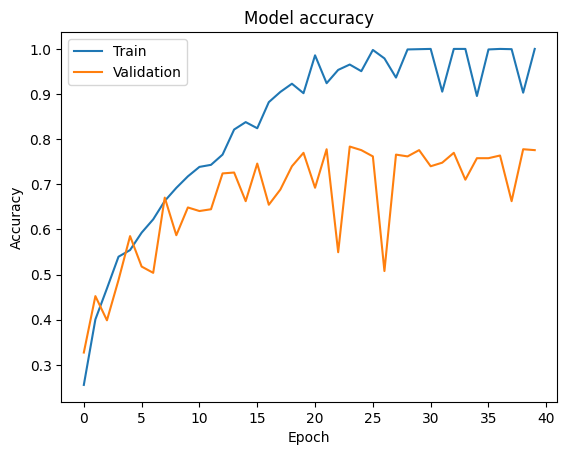

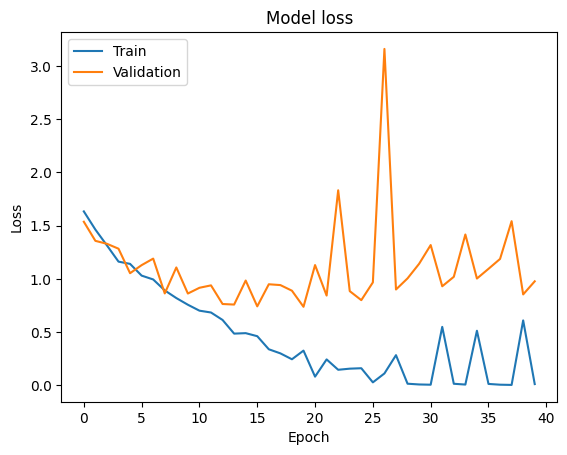

In [9]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#with augumentation

In [4]:
train_datagen2=ImageDataGenerator(rescale=1./255,
                                 rotation_range=20,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                 brightness_range=[0.5, 1.5]
                               )
test_datagen2=ImageDataGenerator(rescale=1./255)

In [5]:
train_data2=train_datagen2.flow_from_directory(train_loc,
                                            batch_size=100,
                                            target_size=(150,150),
                                            class_mode='categorical'
                                            )
val_data2=train_datagen2.flow_from_directory(val_loc,
                                            batch_size=100,
                                            target_size=(150,150),
                                            class_mode='categorical'
                                            )


Found 1764 images belonging to 5 classes.
Found 504 images belonging to 5 classes.
Found 253 images belonging to 5 classes.


In [8]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(80),
    tf.keras.layers.Dense(5, activation='softmax')
])

model2.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['acc'])


In [12]:
history2=model2.fit(train_data2,
                 epochs=100,
                 validation_data=val_data2,
                 verbose=1,
                 )

Epoch 1/100
18/18 [==============================] - 45s 3s/step - loss: 0.6380 - acc: 0.7619 - val_loss: 0.5819 - val_acc: 0.7817
Epoch 2/100
18/18 [==============================] - 40s 2s/step - loss: 0.6586 - acc: 0.7387 - val_loss: 0.6065 - val_acc: 0.7917
Epoch 3/100
18/18 [==============================] - 30s 2s/step - loss: 0.6265 - acc: 0.7528 - val_loss: 0.4975 - val_acc: 0.8075
Epoch 4/100
18/18 [==============================] - 29s 2s/step - loss: 0.6399 - acc: 0.7738 - val_loss: 0.8092 - val_acc: 0.6845
Epoch 5/100
18/18 [==============================] - 30s 2s/step - loss: 0.5775 - acc: 0.7829 - val_loss: 0.6433 - val_acc: 0.7282
Epoch 6/100
18/18 [==============================] - 30s 2s/step - loss: 0.6089 - acc: 0.7783 - val_loss: 0.5306 - val_acc: 0.8175
Epoch 7/100
18/18 [==============================] - 29s 2s/step - loss: 0.6012 - acc: 0.7732 - val_loss: 0.5991 - val_acc: 0.7738
Epoch 8/100
18/18 [==============================] - 30s 2s/step - loss: 0.5964 - a

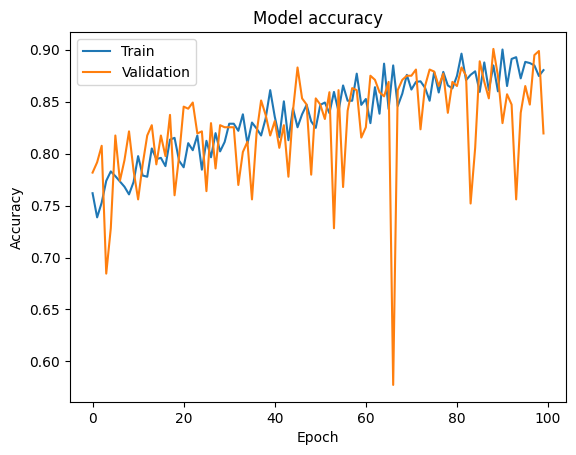

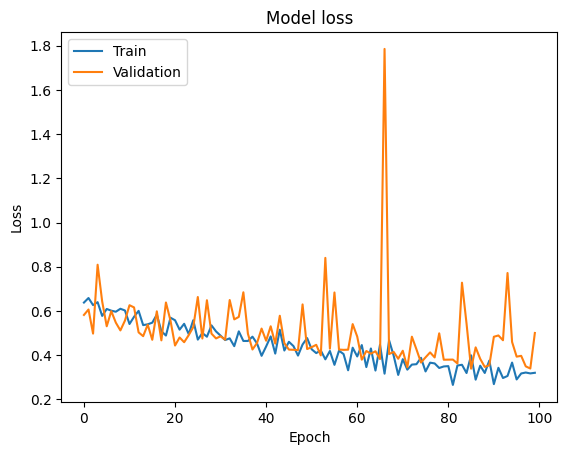

In [13]:
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [16]:
predictions=model2.predict(test_data2)

3/3 [==============================] - 3s 819ms/step


In [18]:
predictions.shape

(253, 5)

In [61]:
test_data2=test_datagen2.flow_from_directory(test_loc,
                                          batch_size=32,
                                          target_size=(150,150),
                                           class_mode='categorical'
                                          )

Found 253 images belonging to 5 classes.


In [54]:
test_acc = 0
test_loss = 0

batch_size = 32  

for i in range(253//32):
    batch = test_data2.next()
    x = batch[0]
    y = batch[1]

    predictions = model2.predict(x)  
    
    for pred, true_label in zip(predictions, y):
        if np.argmax(pred) == np.argmax(true_label):
            test_acc += 1
        else:
            test_loss += 1


total_samples = 253
accuracy = (test_acc / total_samples) * 100
loss_percentage = (test_loss / total_samples) * 100

print(f'Test Accuracy: {accuracy:.2f}%')
print(f'Test Loss: {loss_percentage:.2f}%')

1/1 [==============================] - 0s 62ms/step
Test Accuracy: 77.47%
Test Loss: 9.88%


1/1 [==============================] - 0s 32ms/step


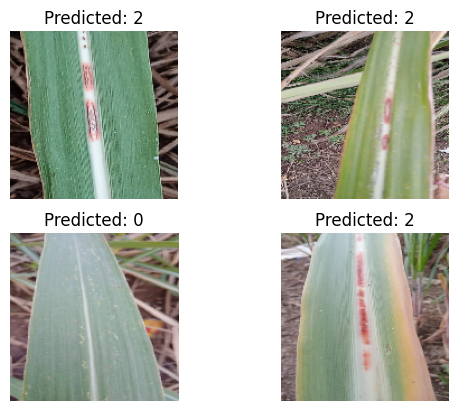

In [60]:
batch = test_data2.next()
images = batch[0][:4]

predictions = model2.predict(images)
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i])
    plt.title(f'Predicted: {np.argmax(predictions[i])}')
    plt.axis('off')

plt.show()
